<a href="https://colab.research.google.com/github/kungfupanda1/PythonClass-Capsule/blob/main/Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import pandas.plotting as plotting

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Open_Parking_and_Camera_Violations (1).csv to Open_Parking_and_Camera_Violations (1).csv
User uploaded file "Open_Parking_and_Camera_Violations (1).csv" with length 294119304 bytes


###Data for 2020, with a violation determination for all vehicle type. I originally wanted to see across multiple years for comparison, but data file got too large, so I had to cut data in certain ways.

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Open_Parking_and_Camera_Violations (1).csv']))
# Dataset is now stored in a Pandas Dataframe

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df2 = df.filter(['Plate','License Type','Summons Number','Issue Date','Violation Time','Violation','Fine Amount','Payment Amount','Precinct','County',"Violation Status"])
display(df2)

,Plate,License Type,Summons Number,Issue Date,Violation Time,Violation,Fine Amount,Payment Amount,Precinct,County,Violation Status
0,JHV7360,PAS,1455043813,05/19/2020,07:30A,NO STANDING-DAY/TIME LIMITS,115.0,0.0,0,NY,HEARING HELD-NOT GUILTY
1,28938MM,COM,1447397976,09/21/2020,09:20A,BIKE LANE,115.0,115.0,6,NY,HEARING HELD-GUILTY
2,JRD6488,PAS,1449593800,10/17/2020,10:26P,OBSTRUCTING DRIVEWAY,95.0,0.0,81,K,HEARING HELD-NOT GUILTY
3,JDN5335,PAS,1309083423,07/16/2020,07:40A,NO STANDING-DAY/TIME LIMITS,115.0,115.0,73,NaN,HEARING HELD-GUILTY
4,15709MJ,COM,1453315287,11/03/2020,11:36A,NON-COMPLIANCE W/ POSTED SIGN,60.0,0.0,84,K,HEARING HELD-NOT GUILTY
...,...,...,...,...,...,...,...,...,...,...,...
1054993,T786106C,OMT,8882504335,12/24/2020,02:13P,REG. STICKER-EXPIRED/MISSING,65.0,0.0,66,K,HEARING HELD-GUILTY
1054994,EH671K,PAS,8883113044,12/24/2020,10:22A,INSP. STICKER-EXPIRED/MISSING,65.0,0.0,76,K,HEARING HELD-GUILTY
1054995,JFH3672,PAS,8884402438,12/09/2020,11:41A,SIDEWALK,115.0,0.0,115,Q,HEARING HELD-GUILTY
1054996,JDK6383,PAS,8885654563,12/30/2020,08:54A,REG. STICKER-EXPIRED/MISSING,65.0,0.0,42,BX,HEARING HELD-GUILTY


In [ ]:
df2['Violation Time'] = pd.to_datetime(df2['Violation Time'])
df2['Issue Date'] = pd.to_datetime(df2['Issue Date'], errors='coerce')

##Ran this function to convert "Issue Date" and "Violation Time" to a date time variable, so I can extract the month and hour of when the violation was issued. However, there was some data that has month's and time's outside a valid range. 

In [ ]:
#display(df2.loc[df2['Issue Date'] == "NaN"])
df2 = df2.drop(labels=405576, axis=0)
df2 = df2.drop(labels=4766, axis=0)
df2 = df2.drop(labels=495373, axis=0)
df2 = df2.drop(labels=791840, axis=0)

##Looked at the data and decided to drop dataset to be more accurate. Did one by one lookup because I was intrigue on why the data had these odd date time.

In [ ]:
df2.dtypes

Plate                       object
License Type                object
Summons Number               int64
Issue Date          datetime64[ns]
Violation Time      datetime64[ns]
Violation                   object
Fine Amount                float64
Payment Amount             float64
Precinct                     int64
County                      object
Violation Status            object
Violation Hour               int64
Violation Month            float64
dtype: object

In [ ]:
df2["Plate"].nunique()

436718

Get unique cars by their license plates number.

In [ ]:
df2["Plate"].value_counts()

47603MD    826
39386ML    543
47602MD    530
17744MD    517
17742MD    495
          ... 
HGF4294      1
EBB8693      1
CROATIA      1
13479EV      1
21541MD      1
Name: Plate, Length: 436718, dtype: int64

Get range of max and min of violation per unique cars

In [ ]:
df2["Plate"].value_counts().mean()

2.4157190681400813

To get average number of violation given to a car within 2020.

In [ ]:
df2['Violation Hour'] = df2['Violation Time'].dt.hour
df2['Violation Month'] = df2['Issue Date'].dt.month
df2['County'].replace({"BX":"Bronx","K":"Brooklyn","BK":"Brooklyn","NY":"Manhattan","MN":"Manhattan","Q":"Queens","QN":"Queens","R":"Staten Island", "SI":"Staten Island","ST":"Staten Island"}, inplace = True)


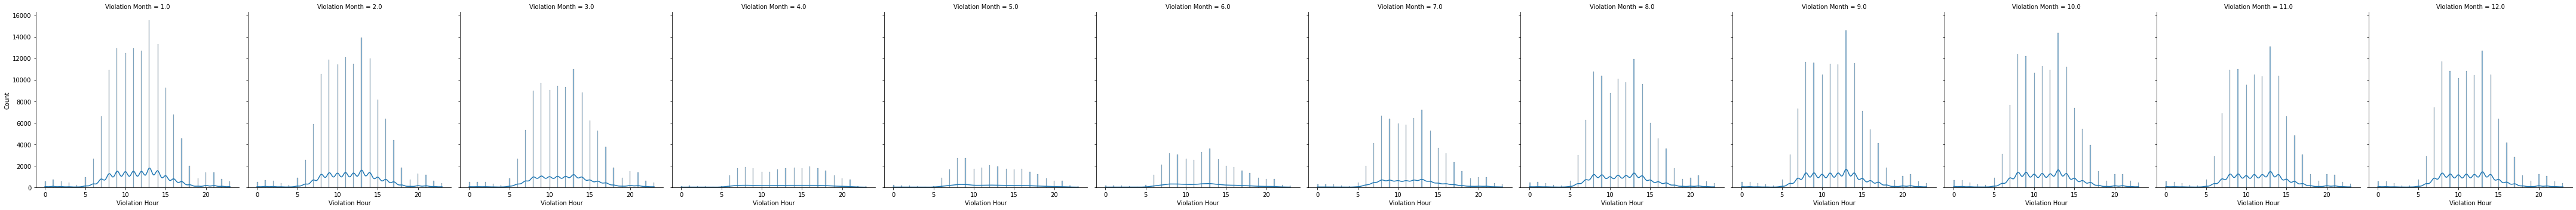

In [95]:
sns.displot(data=df2, x="Violation Hour", col="Violation Month", kde=True)

##wanted to see if data varies across month and hour, but can generalized across the year.

                  count  percentage
Violation Month                    
1.0              130734       12.39
2.0              119920       11.37
3.0               98963        9.38
4.0               25055        2.37
5.0               26207        2.48
6.0               34364        3.26
7.0               65077        6.17
8.0              102327        9.70
9.0              117758       11.16
10.0             119188       11.30
11.0             107291       10.17
12.0             108108       10.25


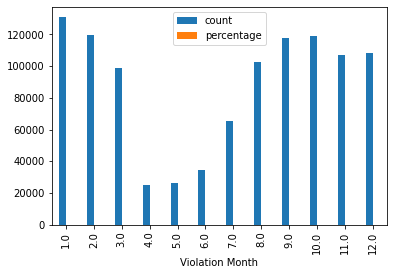

In [ ]:
df2_allmonth =df2.reset_index().groupby(['Violation Month']).size().to_frame('count')
df2_allmonth['percentage'] = round(df2_allmonth['count'].div(1054998).mul(100),2)
print (df2_allmonth)
df2_allmonth.plot.bar()

                 count  percentage
Violation Hour                    
0                 4964        0.47
1                 5223        0.50
2                 4253        0.40
3                 2651        0.25
4                 1702        0.16
5                 7139        0.68
6                27822        2.64
7                62926        5.96
8               102249        9.69
9               104350        9.89
10               94239        8.93
11              100207        9.50
12               99788        9.46
13              121604       11.53
14               98649        9.35
15               66102        6.27
16               51397        4.87
17               37172        3.52
18               18497        1.75
19                9266        0.88
20               12771        1.21
21               12523        1.19
22                5675        0.54
23                3825        0.36


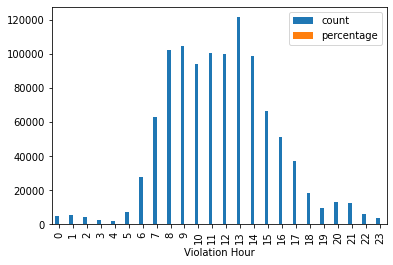

In [ ]:
df2_alltime =df2.reset_index().groupby(['Violation Hour']).size().to_frame('count')
df2_alltime['percentage'] = round(df2_alltime['count'].div(1054998).mul(100),2)
print (df2_alltime)
df2_alltime.plot.bar()

In [ ]:
df2_vehicle =df2.reset_index().groupby(['License Type']).size().to_frame('count')
df2_vehicle['percentage'] = round(df2_vehicle['count'].div(1054998).mul(100),2)
display(df2_vehicle.sort_values(by='count', ascending=False))

,count,percentage
License Type,,
PAS,683031,64.74
COM,240661,22.81
OMT,54378,5.15
LMB,14792,1.40
SRF,14240,1.35
...,...,...
CBS,1,0.00
SNO,1,0.00
OMF,1,0.00


##Wanted to see what vehicle type receives a lot of violation, saw that the top 5 were: Passenger, commericial, taxi, motorcycle, and city officials/health profession.

                count  percentage
County                           
08                  1        0.00
Bronx          125453       11.89
Brooklyn       254887       24.16
Manhattan      388735       36.85
Queens         261919       24.83
Staten Island   21221        2.01


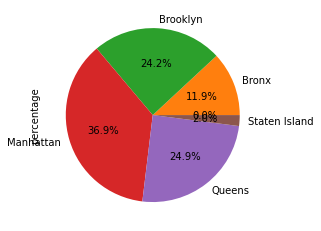

In [ ]:
df2_allborough =df2.reset_index().groupby(['County']).size().to_frame('count')
df2_allborough['percentage'] = round(df2_allborough['count'].div(1054998).mul(100),2)
print (df2_allborough)
df2_allborough['percentage'].plot.pie(autopct="%.1f%%")

In [ ]:
df2_allstatus =df2.reset_index().groupby(['Violation Status']).size().to_frame('count').sort_values(['count'], ascending=False)
df2_allstatus['percentage'] = round(df2_allstatus['count'].div(1054998).mul(100),2)
print (df2_allstatus)

                          count  percentage
Violation Status                           
HEARING HELD-GUILTY      651030       61.71
HEARING HELD-NOT GUILTY  403964       38.29


##Wanted to know if I did get a violation, could I fight it? But it seems the odds are not in our favor.

In [ ]:
df2_alltype =df2.reset_index().groupby(['Violation']).size().to_frame('count').sort_values(['count'], ascending=False).head(10)
df2_alltype['percentage'] = round(df2_alltype['count'].div(1054998).mul(100),2)
display(df2_alltype)

,count,percentage
Violation,,
FAIL TO DSPLY MUNI METER RECPT,169662,16.08
NO PARKING-STREET CLEANING,98193,9.31
NO STANDING-DAY/TIME LIMITS,86695,8.22
PHTO SCHOOL ZN SPEED VIOLATION,83345,7.90
NO PARKING-DAY/TIME LIMITS,69585,6.60
DOUBLE PARKING,63654,6.03
FIRE HYDRANT,51579,4.89
INSP. STICKER-EXPIRED/MISSING,45769,4.34
FRONT OR BACK PLATE MISSING,44930,4.26


###As this was an extension of my project to looking for trying to see if there was a quota in NYC for giving a violation. However, it was debunked immediately by looking at the month, expecting more violation would be given at end of fiscal year. What was interesting is after expanding data to all vehicle type and to all issuing agency, it didn't seem to change. I would have really like to be able to analyze across the years to see if it has changed. Overall conclusion, is to avoid driving outside of 6AM-5PM. In addition, best time to drive is between April to June, however, that could probably be affected by less individuals in NYC because of summer vacations.